In [ ]:
# Linking with google drive
# simple upload to github, manual here: https://medium.com/analytics-vidhya/how-to-use-google-colab-with-github-via-google-drive-68efb23a42d

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
%cd /content/drive/My Drive/time_series_analysis/time_series_prediction

/content/drive/My Drive/time_series_analysis/time_series_prediction


In [2]:
#!git clone https://{git_token}@github.com/{username}/{repository}

In [3]:
# trying to import python module as a separate script

In [4]:
import sys
sys.path.append('/content/drive/MyDrive/time_series_analysis/time_series_prediction/dataprocessing/')
sys.path.append('/content/drive/MyDrive/time_series_analysis/time_series_prediction/models/')
sys.path.append('/content/drive/MyDrive/time_series_analysis/time_series_prediction/utils/')

In [5]:
#!pip install nbimporter

In [137]:
import datapreparation
import baselines
import plotting
from matplotlib import pyplot as plt


from sklearn.metrics import *
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate, cross_val_score

In [7]:
#%load utils/plotting.ipynb

In [8]:
#%load models/baselines.ipynb

In [9]:
#%load time_series_prediction/models/baselines.py

In [10]:
#%load time_series_prediction/dataprocessing/datapreparation.py

In [11]:
#!pip install statsmodels==0.12.1

In [12]:
import pandas as pd
import numpy as np

In [13]:
sales_data = pd.read_csv("/content/sales.csv",   header = 0, sep = ";")
categories = pd.read_csv("/content/categories.csv",   header = 0, sep = ";")
traffic = pd.read_csv("/content/traffic.csv",   header = 0, sep = ";")

In [14]:
traffic['DateTime'] = traffic['week_starting_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
traffic.drop("week_starting_date", axis = 1, inplace = True)

traffic = traffic.set_index(["product_id", "DateTime"])
categories = categories.set_index(["product_id"])

In [15]:
# extended only to global max date horizon
# check nulls here because looks strange
sales_df_combined_right = datapreparation.prepare_sales_data(sales_data, categories, traffic, True, True, [1,2,3])

In [16]:
sample = sales_df_combined_right.loc[[2658, 1308]]

In [17]:
# for i in all_items:
#   print("*******************")
#   print(i)
#   tmp_dataset = sales_df_combined_right.loc[i]
#   #n_splits_tmp = int(np.floor((tmp_dataset.shape[0] - 3)/2))
#   try:
#     tscv = TimeSeriesSplit(n_splits=5, test_size = 3)
#     for tr_index, val_index in tscv.split(tmp_dataset):
#       print (tr_index, val_index)
#       X_tr, X_val = tmp_dataset[["sales"]].iloc[tr_index], tmp_dataset[["sales"]].iloc[val_index]
#       print(X_tr)
#       print(X_val)
#       forecast = get_naive_forecast(X_tr.sales, horizon = 3)
#       print(forecast)
#       print(mean_absolute_percentage_error(X_val.sales, forecast))
#   except Exception as e:
#     print(e)

In [18]:
model_naive = baselines.NaiveForecast(horizon=3)

In [19]:
model_mean = baselines.MeanForecast(horizon=3)

In [20]:
model_drift = baselines.DriftForecast(horizon=3)

### Study on one case 2658

In [48]:
sales_df_combined_right.loc[2658]

,sales,category_id,traffic,Week_numb,YW,Month,sales_lag_1W,traffic_lag_1W,sales_lag_2W,traffic_lag_2W,sales_lag_3W,traffic_lag_3W
DateTime,,,,,,,,,,,,
2020-02-17,17.0,22,NaN,8,202008,2,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-24,37.0,22,14.0,9,202009,2,17.0,NaN,0.0,0.0,0.0,0.0
2020-03-02,25.0,22,16.0,10,202010,3,37.0,14.0,17.0,NaN,0.0,0.0
2020-03-09,170.0,22,36.0,11,202011,3,25.0,16.0,37.0,14.0,17.0,NaN
2020-03-16,242.0,22,87.0,12,202012,3,170.0,36.0,25.0,16.0,37.0,14.0
2020-03-23,316.0,22,120.0,13,202013,3,242.0,87.0,170.0,36.0,25.0,16.0
2020-03-30,757.0,22,191.0,14,202014,3,316.0,120.0,242.0,87.0,170.0,36.0
2020-04-06,292.0,22,94.0,15,202015,4,757.0,191.0,316.0,120.0,242.0,87.0
2020-04-13,268.0,22,80.0,16,202016,4,292.0,94.0,757.0,191.0,316.0,120.0


In [21]:
# baseline models
drift_forecast = model_drift.fit(sales_df_combined_right.loc[2658].sales[:-3]).predict(sales_df_combined_right.loc[2658].sales[-3:])
naive_forecast = model_naive.fit(sales_df_combined_right.loc[2658].sales[:-3]).predict(sales_df_combined_right.loc[2658].sales[-3:])
mean_forecast = model_mean.fit(sales_df_combined_right.loc[2658].sales[:-3]).predict(sales_df_combined_right.loc[2658].sales[-3:])

In [22]:
forecasts = {'drift_foreast': drift_forecast, 'naive_forecast': naive_forecast, 'mean_forecast': mean_forecast}

In [23]:
#!pip install scikit-learn==0.24.0

In [24]:
tscv = TimeSeriesSplit(n_splits=10, test_size = 3)
cv_scores = cross_val_score(model_naive, sales_df_combined_right.loc[2658].sales, sales_df_combined_right.loc[2658].sales,  cv=tscv, 
                            scoring='neg_root_mean_squared_error', n_jobs=1)

In [25]:
cv_scores

array([ -23.44497103,  -16.51262144,  -20.16597795,  -51.17942295,
        -15.28615932,  -40.81666326, -141.99530509, -116.83606749,
       -100.4473328 , -197.10318787])

In [26]:
tscv = TimeSeriesSplit(n_splits=10, test_size = 3)
cv_scores_multiple = cross_validate(model_naive, sales_df_combined_right.loc[2658].sales, sales_df_combined_right.loc[2658].sales,  cv=tscv, 
                            scoring=['neg_root_mean_squared_error'
                            , 'neg_mean_absolute_error'
                            , 'neg_mean_squared_log_error'
                            , 'neg_mean_absolute_percentage_error'], n_jobs=1)

In [27]:
[(i, np.mean(cv_scores_multiple[i])) for i in cv_scores_multiple.keys() if 'test' in i]

[('test_neg_root_mean_squared_error', -72.3787709188653),
 ('test_neg_mean_absolute_error', -67.33333333333333),
 ('test_neg_mean_squared_log_error', -1.1182639570608979),
 ('test_neg_mean_absolute_percentage_error', -1.859573356923228)]

In [28]:
#[i for i in tscv.split(sales_df_combined_right.loc[2658].sales)][9][0]

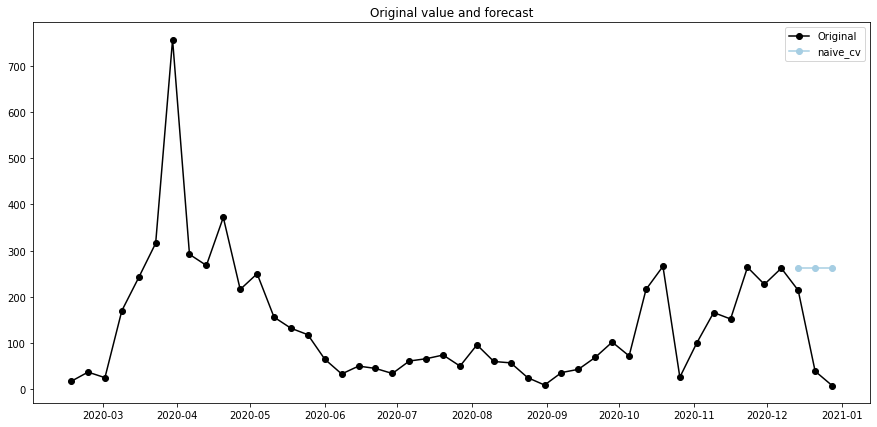

In [29]:
sales_df_combined_right.loc[2658].sales[[i for i in tscv.split(sales_df_combined_right.loc[2658].sales)][9][0]]
naive_cv = {'naive_cv': model_naive.fit(sales_df_combined_right.loc[2658].sales[[i for i in tscv.split(sales_df_combined_right.loc[2658].sales)][9][0]]).predict(sales_df_combined_right.loc[2658].sales[[i for i in tscv.split(sales_df_combined_right.loc[2658].sales)][9][1]])}

plotting.plot_original_and_forecasts(original_series = sales_df_combined_right.loc[2658].sales
                                     , dict_with_forecasts = naive_cv)

In [30]:
cv_scores_multiple

{'fit_time': array([0.00232053, 0.00078583, 0.0007453 , 0.00073886, 0.000736  ,
        0.00091672, 0.00150681, 0.0009644 , 0.00083017, 0.00123882]),
 'score_time': array([0.00441909, 0.00266838, 0.00251698, 0.00283122, 0.00305009,
        0.00314879, 0.0040884 , 0.00306344, 0.00396276, 0.00446367]),
 'test_neg_mean_absolute_error': array([ -22.33333333,  -16.        ,  -18.        ,  -48.66666667,
         -15.        ,  -38.        , -128.        , -113.33333333,
         -99.        , -175.        ]),
 'test_neg_mean_absolute_percentage_error': array([ -0.57138047,  -0.30133544,  -0.24686937,  -1.37473684,
         -0.83397933,  -0.45267358,  -1.05507358,  -0.80410695,
         -0.39149541, -12.56408259]),
 'test_neg_mean_squared_log_error': array([-0.21225523, -0.10173394, -0.0746976 , -0.73769667, -0.43808633,
        -0.39843534, -1.2859371 , -2.6898687 , -0.2514351 , -4.99249355]),
 'test_neg_root_mean_squared_error': array([ -23.44497103,  -16.51262144,  -20.16597795,  -51.1794

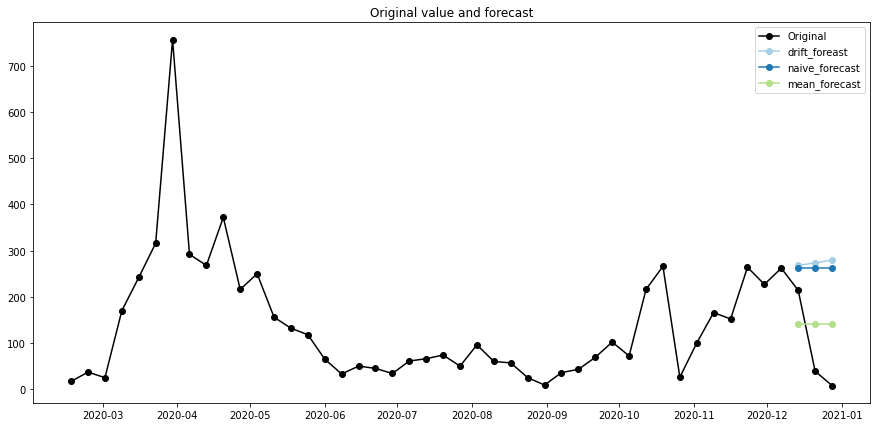

In [31]:
plotting.plot_original_and_forecasts(original_series = sales_df_combined_right.loc[2658].sales, dict_with_forecasts = forecasts)

In [32]:
# cross validation error

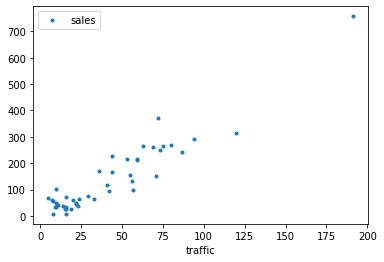

In [33]:
sales_df_combined_right.loc[2658].plot(x='traffic', y='sales', style='.')
#sales_df_combined_right.loc[2658].plot(x='traffic_lag_1W', y='sales', style='.')
#sales_df_combined_right.loc[2658].plot(x='traffic_lag_2W', y='sales', style='.')

In [34]:
abc = sales_df_combined_right.loc[2658].query("~((traffic == 0) | (traffic == 'NaN'))")

In [35]:
abc1 = sales_df_combined_right.loc[2658].query("~((traffic_lag_1W == 0) | (traffic_lag_1W == 'NaN'))")

In [36]:
# building linear regression on this certain case

import numpy as np
from sklearn.linear_model import LinearRegression
X = abc[["sales", "traffic"]].values[:,1].reshape(-1, 1)
# y = 1 * x_0 + 2 * x_1 + 3
y = abc[["sales", "traffic"]].values[:,0].reshape(-1, 1)
reg = LinearRegression()
fitted = reg.fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)


0.8790102676847945
[[3.518694]]
[-8.0354083]


In [37]:
tscv = TimeSeriesSplit(n_splits=10, test_size = 3)
cv_scores_multiple_lr = cross_validate(reg, X, y,  cv=tscv, 
                            scoring=['neg_root_mean_squared_error'
                            , 'neg_mean_absolute_error'
                            , 'neg_mean_squared_log_error'
                            , 'neg_mean_absolute_percentage_error'], n_jobs=1)

In [38]:
[(i, np.mean(cv_scores_multiple_lr[i])) for i in cv_scores_multiple_lr.keys() if 'test' in i]

[('test_neg_root_mean_squared_error', -39.86619223788283),
 ('test_neg_mean_absolute_error', -35.67405704350786),
 ('test_neg_mean_squared_log_error', -1.2871739145769956),
 ('test_neg_mean_absolute_percentage_error', -0.630151751403615)]

In [39]:
tscv = TimeSeriesSplit(n_splits=10, test_size = 3)
cv_scores_multiple_lr_lag = cross_validate(reg, abc1[["sales", "traffic"]].values[:,1].reshape(-1, 1), abc1[["sales", "traffic"]].values[:,0].reshape(-1, 1),  cv=tscv, 
                            scoring=['neg_root_mean_squared_error'
                            , 'neg_mean_absolute_error'
                            , 'neg_mean_squared_log_error'
                            , 'neg_mean_absolute_percentage_error'], n_jobs=1)

In [40]:
[(i, np.mean(cv_scores_multiple_lr_lag[i])) for i in cv_scores_multiple_lr_lag.keys() if 'test' in i]

[('test_neg_root_mean_squared_error', -40.06594725934209),
 ('test_neg_mean_absolute_error', -35.79999230087854),
 ('test_neg_mean_squared_log_error', -1.4235829562478919),
 ('test_neg_mean_absolute_percentage_error', -0.6337475010967785)]

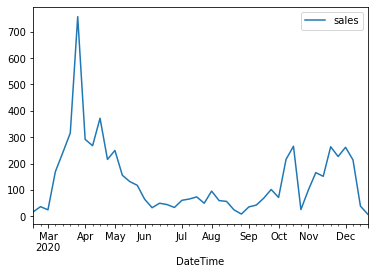

In [86]:
series.plot()

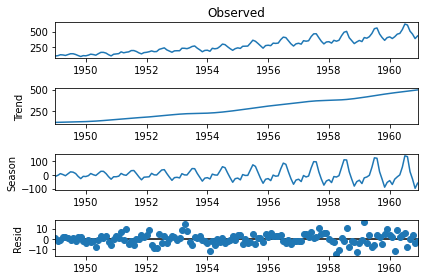

In [114]:
#define a lambda function that converts a string with format %Y-%m to datetime
custom_date_parser = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

#parse the data using pandas read_csv
AirPassengers = pd.read_csv('/content/AirPassengers.csv', 
                            parse_dates = ['Month'], 
                            index_col   = 'Month',
                            date_parser = custom_date_parser)
AirPassengers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


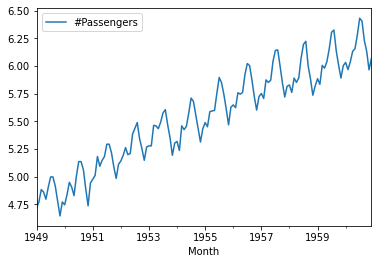

In [117]:
np.log(AirPassengers).plot()

In [61]:
import statsmodels
statsmodels.__version__


'0.12.1'

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = sales_df_combined_right.loc[2658].asfreq(freq = "W-MON")[["sales"]]

In [73]:
series = series.set_index(pd.to_datetime(series.index, format='%Y-%m-%d'))

In [75]:
series.index

DatetimeIndex(['2020-02-17', '2020-02-24', '2020-03-02', '2020-03-09',
               '2020-03-16', '2020-03-23', '2020-03-30', '2020-04-06',
               '2020-04-13', '2020-04-20', '2020-04-27', '2020-05-04',
               '2020-05-11', '2020-05-18', '2020-05-25', '2020-06-01',
               '2020-06-08', '2020-06-15', '2020-06-22', '2020-06-29',
               '2020-07-06', '2020-07-13', '2020-07-20', '2020-07-27',
               '2020-08-03', '2020-08-10', '2020-08-17', '2020-08-24',
               '2020-08-31', '2020-09-07', '2020-09-14', '2020-09-21',
               '2020-09-28', '2020-10-05', '2020-10-12', '2020-10-19',
               '2020-10-26', '2020-11-02', '2020-11-09', '2020-11-16',
               '2020-11-23', '2020-11-30', '2020-12-07', '2020-12-14',
               '2020-12-21', '2020-12-28'],
              dtype='datetime64[ns]', name='DateTime', freq='W-MON')

In [ ]:
### zrobic regresje liniowa i przejsc moze do exponential smoothing, splines i pokombinowac ze zmiennymi (ilorazy, roznice)

In [ ]:
class TimeSeries(object):
  def __init__(self, series_with_numbers):
    self._time_col = time_col
    self._values = df
    self._product_id = df.product_id.iloc[0]

    self._time_indexed = pd.to_datetime(df[time_col])

    self.init_ts()
    self._how_many_nonzero_initaly()
  
  def init_ts(self):
    self._values.index = self._time_indexed
    self._ts = self._values.asfreq('W-Mon').sort_index(ascending = True).fillna(0)

  def _how_many_nonzero_initaly(self):
    self._non_zero_weeks = self._values.shape[0]
    self._non_zero_share = 100*round(self._non_zero_weeks/self._ts.shape[0],4)

  def plot_time_series(self, col_to_plot):
    self._ts[[col_to_plot]].plot(marker='o', title = f"product_id = {self._product_id}")

## Evaluating on whole category products

In [54]:
category_22 = sales_df_combined_right.query("category_id == '22'")

In [93]:
category_22.index.get_level_values(level = 0).unique()

Int64Index([  21,   28,  118,  135,  163,  223,  288,  357,  494,  513,  538,
             561,  609,  637,  681,  701,  789,  840,  975, 1007, 1065, 1139,
            1211, 1300, 1453, 1476, 1531, 1538, 1565, 1592, 1651, 1726, 1794,
            1813, 2075, 2180, 2232, 2567, 2587, 2605, 2614, 2658, 2778, 2886,
            2891, 3057, 3110],
           dtype='int64', name='product_id')

In [119]:
series = sales_df_combined_right.loc[681].asfreq(freq = "W-MON")[["sales"]]

In [120]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [121]:
lag_acf  = acf(series, nlags=40)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


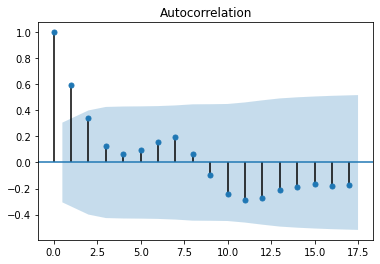

In [122]:
p=plot_acf(lag_acf)

In [126]:
from scipy import stats

In [128]:
series

,sales
DateTime,
2019-01-14,3.0
2019-01-21,1.0
2019-01-28,4.0
2019-02-04,6.0
2019-02-11,2.0
...,...
2020-11-30,44.0
2020-12-07,39.0
2020-12-14,35.0


In [131]:
import scipy
from scipy.special import boxcox1p
scipy.special.boxcox1p(series.sales)

TypeError: ignored

In [132]:
stats.boxcox(series.sales+1)

(array([1.19485911, 0.64288892, 1.35537877, 1.58300223, 0.97593853,
        0.97593853, 1.35537877, 0.97593853, 1.58300223, 1.19485911,
        1.66876851, 1.35537877, 2.24278187, 0.97593853, 1.35537877,
        1.48080814, 1.19485911, 0.64288892, 0.97593853, 1.19485911,
        1.19485911, 1.48080814, 1.35537877, 1.35537877, 0.97593853,
        1.35537877, 1.48080814, 1.74235663, 1.58300223, 1.35537877,
        1.35537877, 0.97593853, 1.19485911, 1.48080814, 0.97593853,
        0.97593853, 1.74235663, 0.97593853, 1.48080814, 1.19485911,
        1.19485911, 0.64288892, 2.1672968 , 2.0020196 , 1.74235663,
        2.1672968 , 1.91427802, 2.10838129, 1.80658714, 1.19485911,
        1.58300223, 0.97593853, 0.97593853, 1.19485911, 0.97593853,
        1.86342207, 1.66876851, 1.19485911, 1.58300223, 1.74235663,
        0.97593853, 2.24278187, 2.1672968 , 2.76604854, 2.10838129,
        2.13883776, 2.30664457, 1.91427802, 2.04033634, 2.26519293,
        2.69206388, 2.47924769, 2.07565663, 1.58

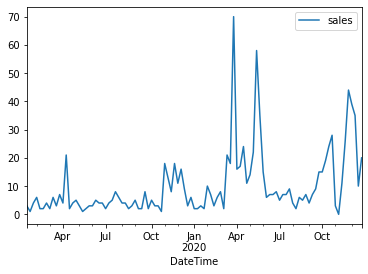

In [123]:
series.plot()

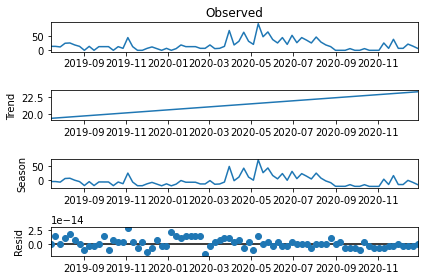

In [106]:
### dekompozycja szeregu czasowego

from statsmodels.tsa.seasonal import STL
stl = STL(series)
res = stl.fit()
fig = res.plot()

In [136]:
plot_original_and_forecasts(new_sales_df.loc[[3], (slice(None))].sales.values, {'traffic': new_sales_df.loc[[3], (slice(None))].traffic.values})

NameError: ignored

/content/drive/MyDrive/time_series_analysis/time_series_prediction/utils/plotting.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,7))
/content/drive/MyDrive/time_series_analysis/time_series_prediction/utils/plotting.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,7))
/content/drive/MyDrive/time_series_analysis/time_series_prediction/utils/plotting.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are reta

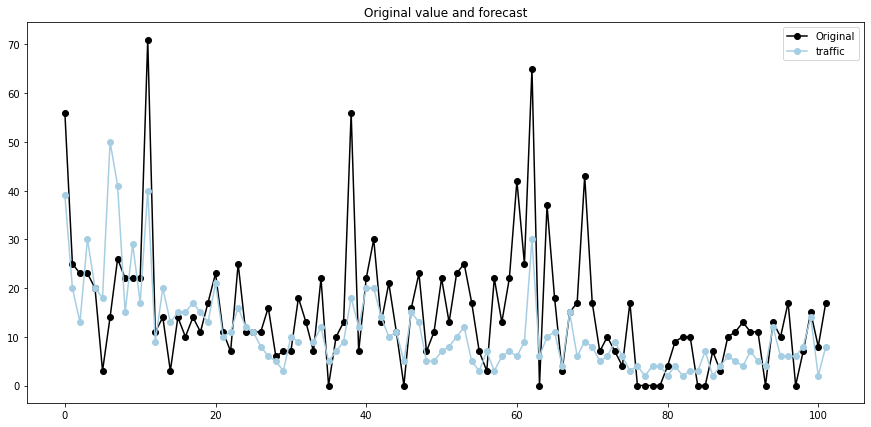

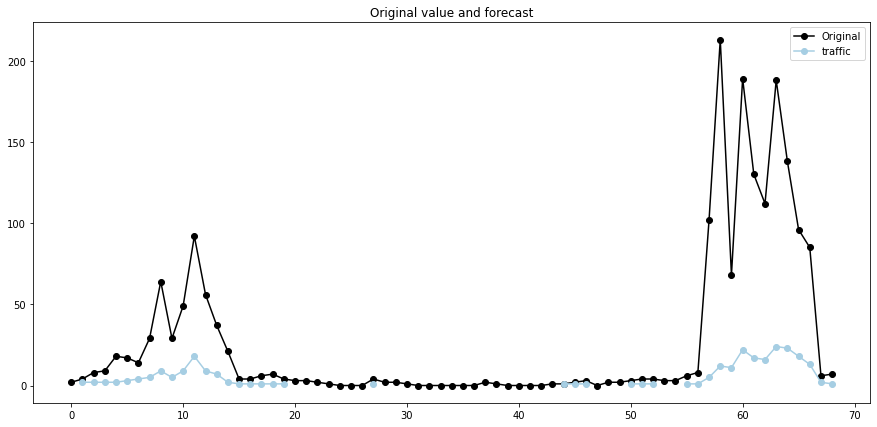

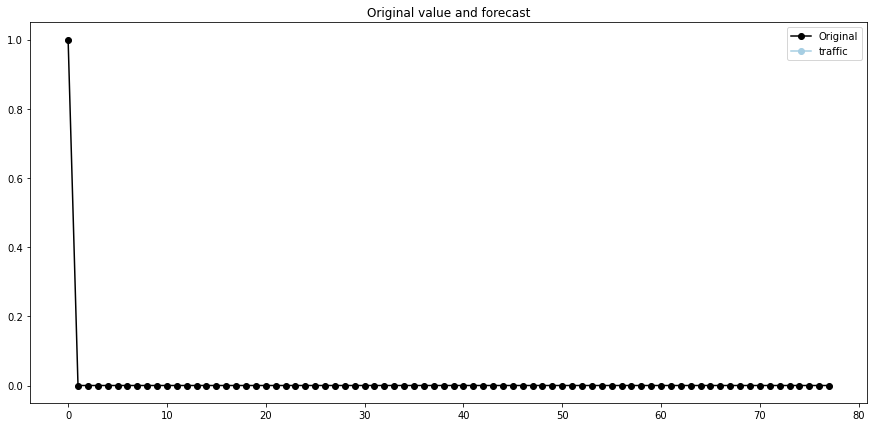

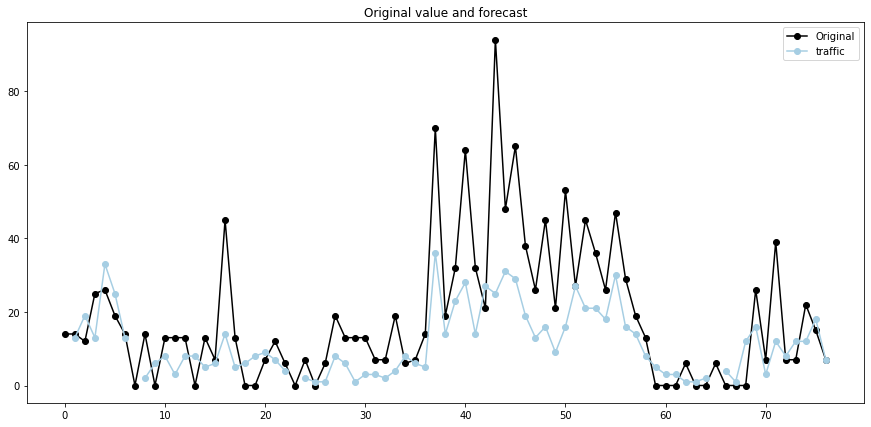

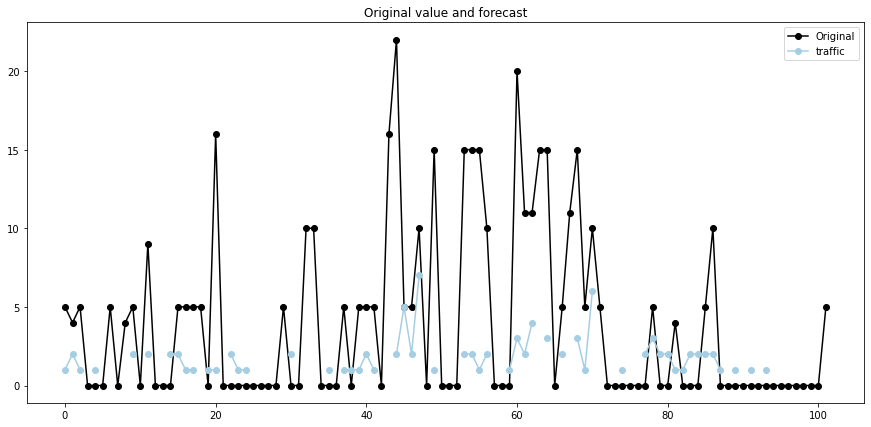

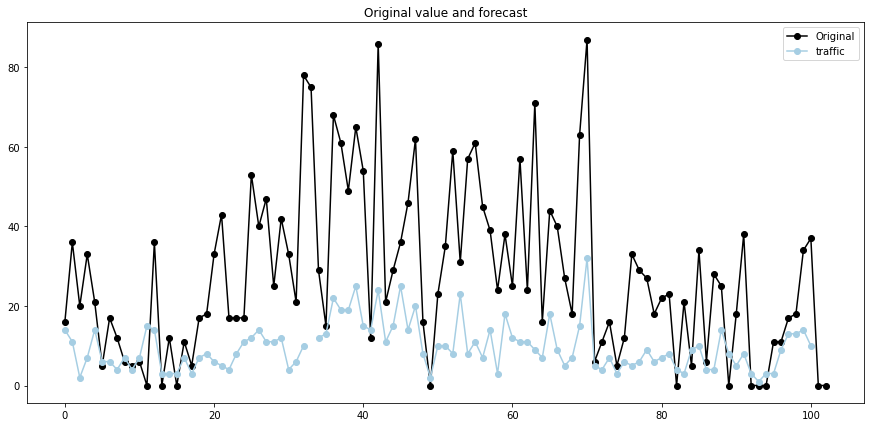

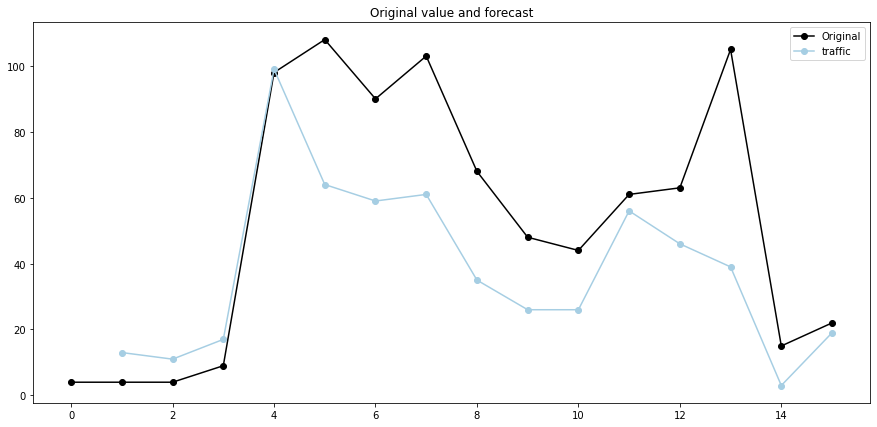

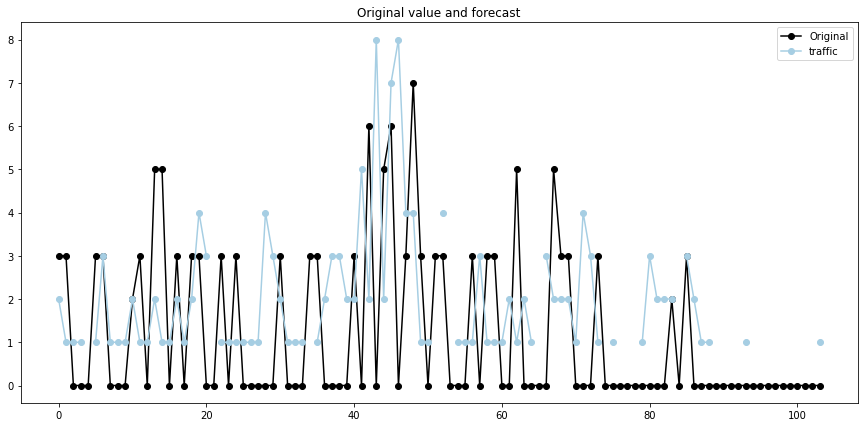

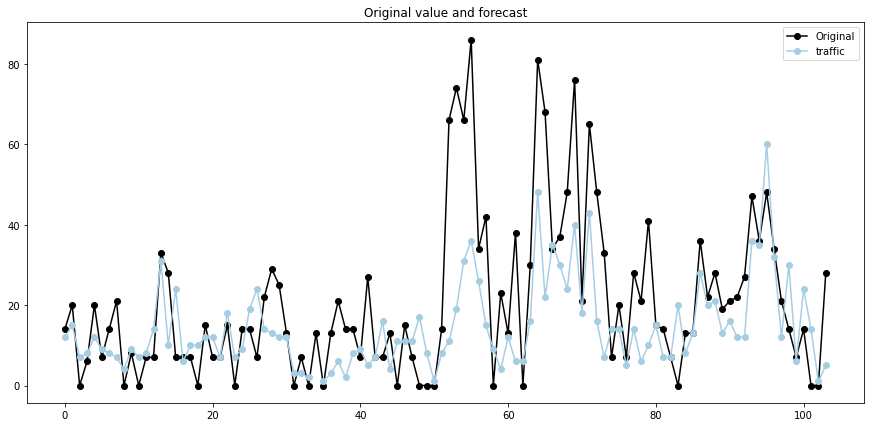

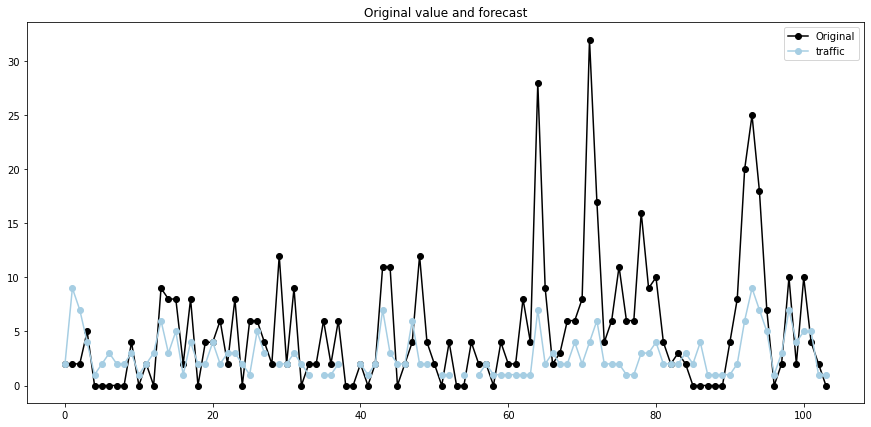

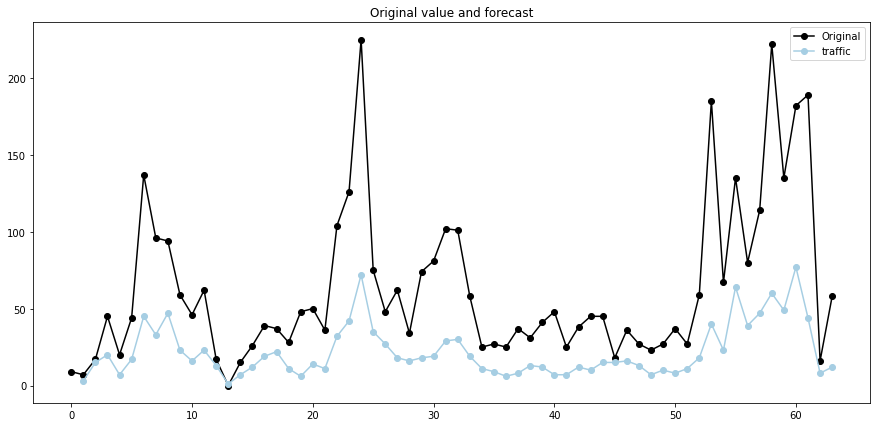

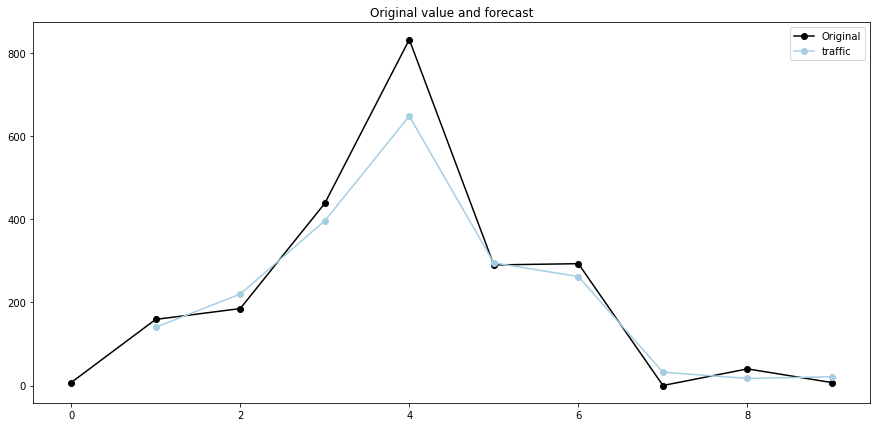

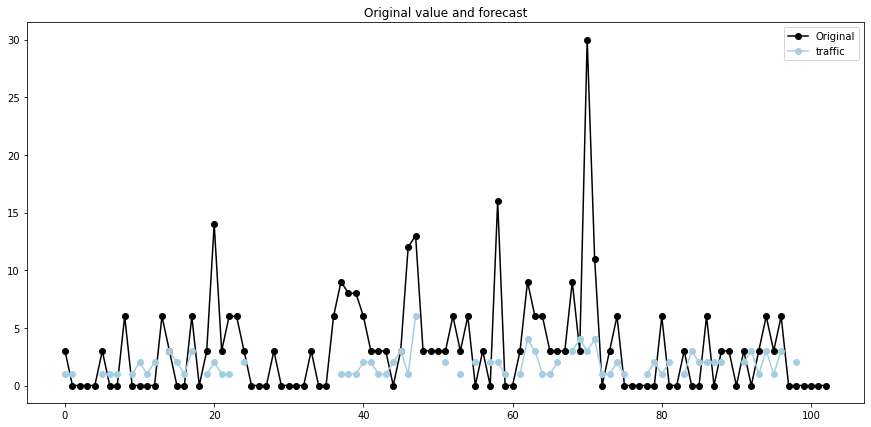

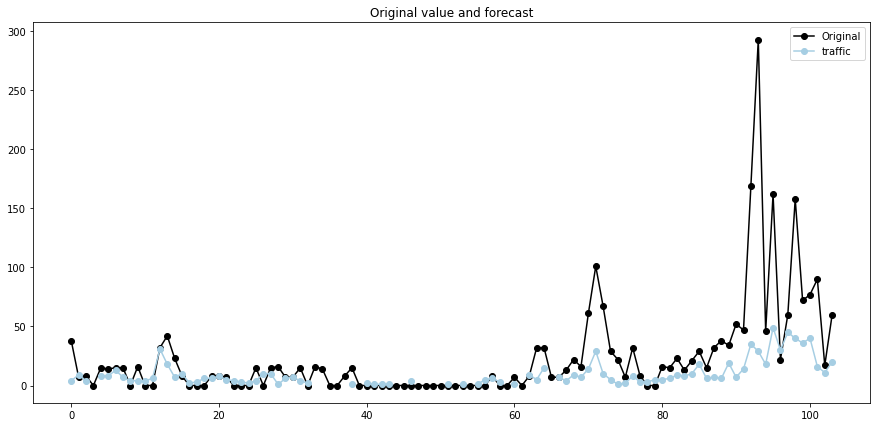

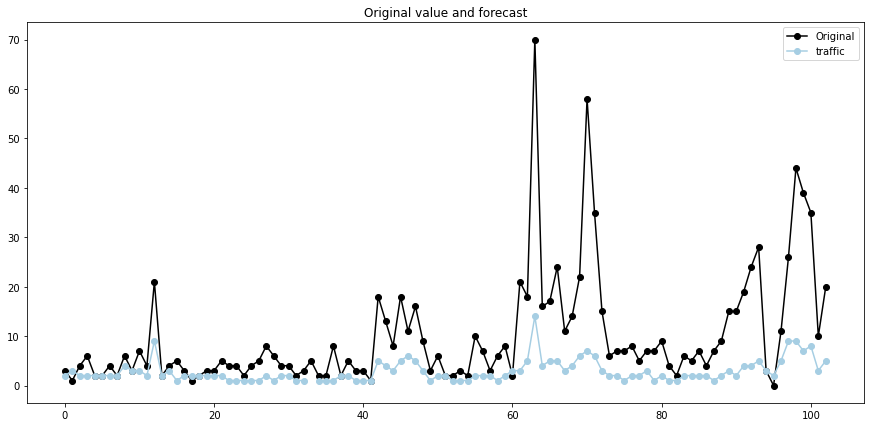

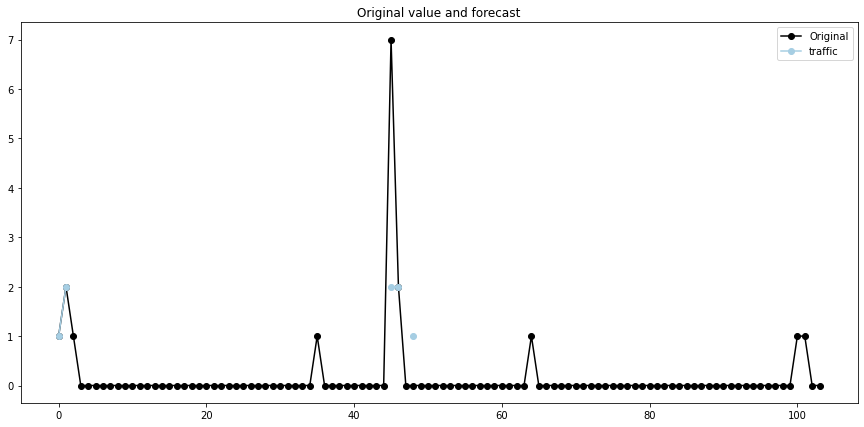

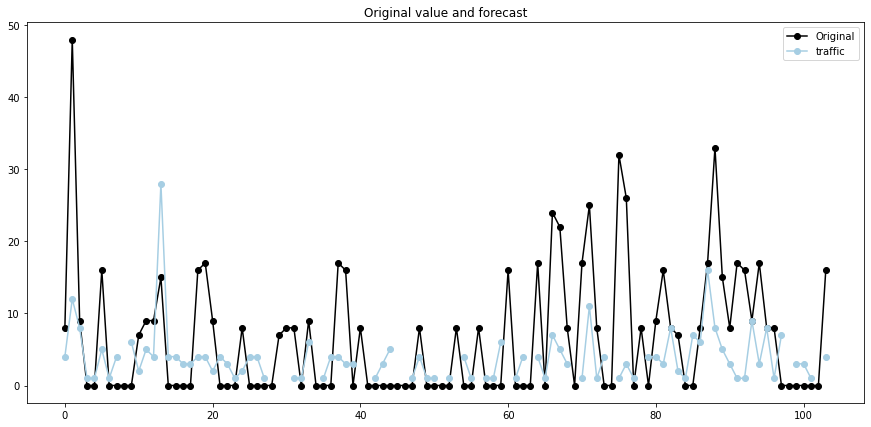

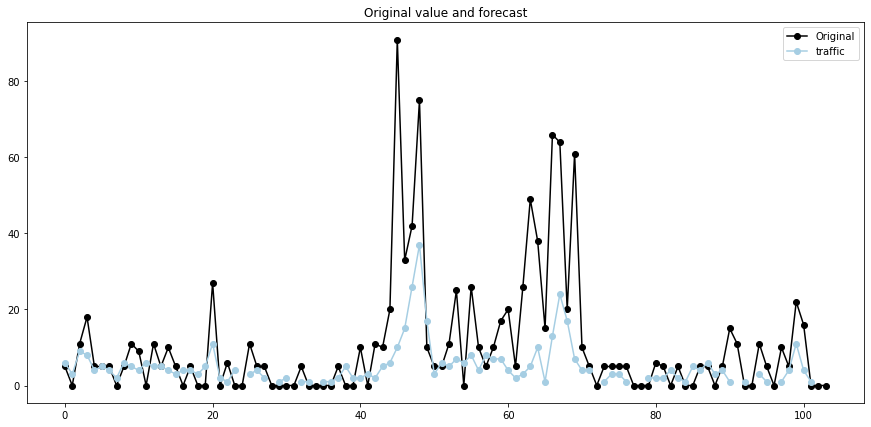

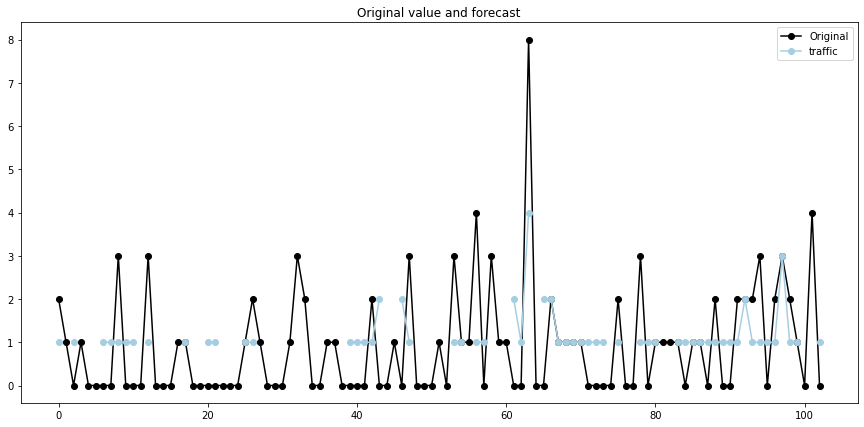

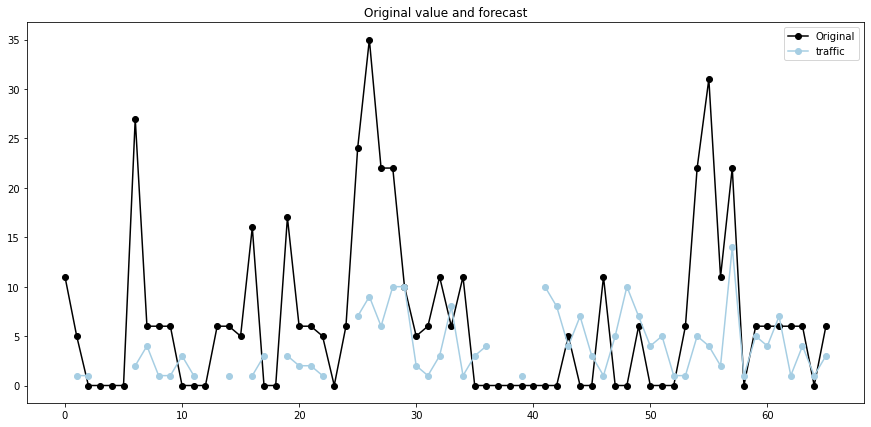

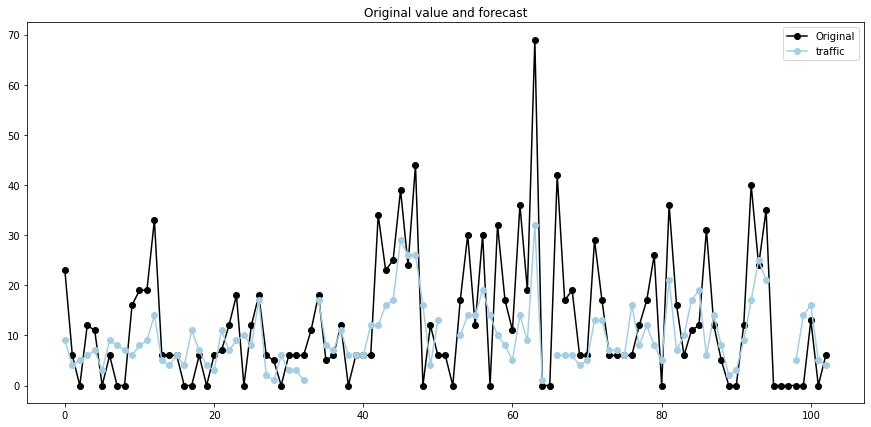

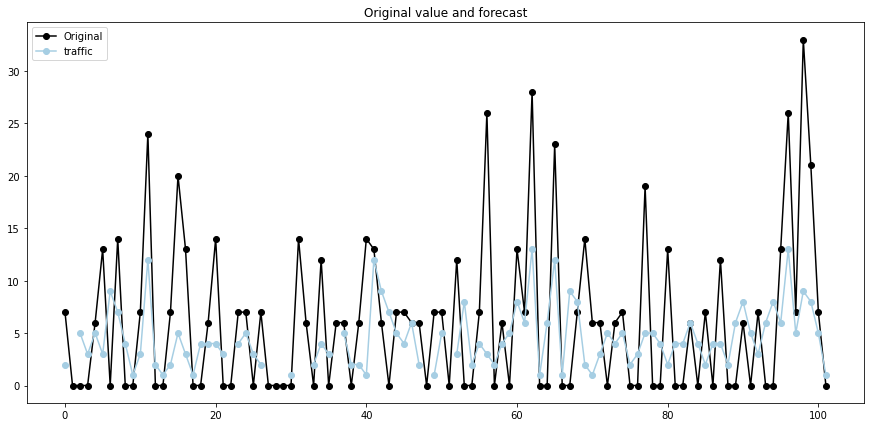

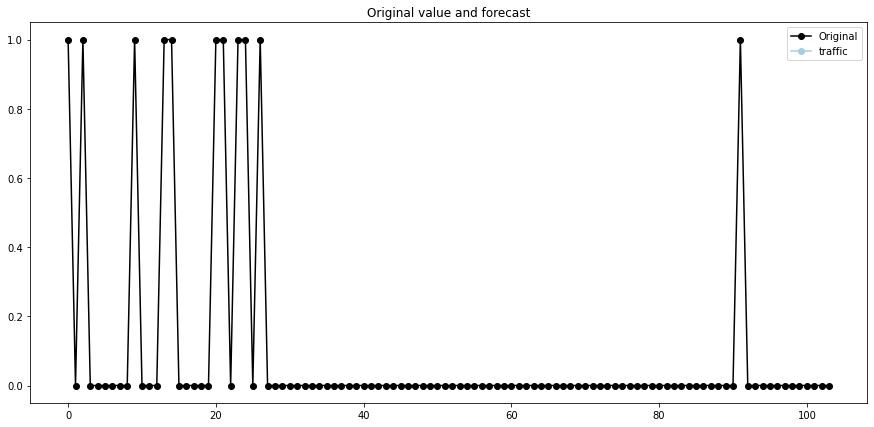

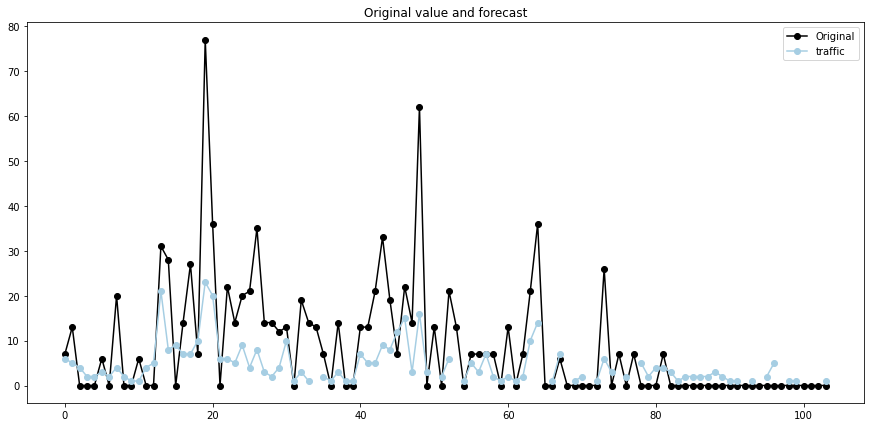

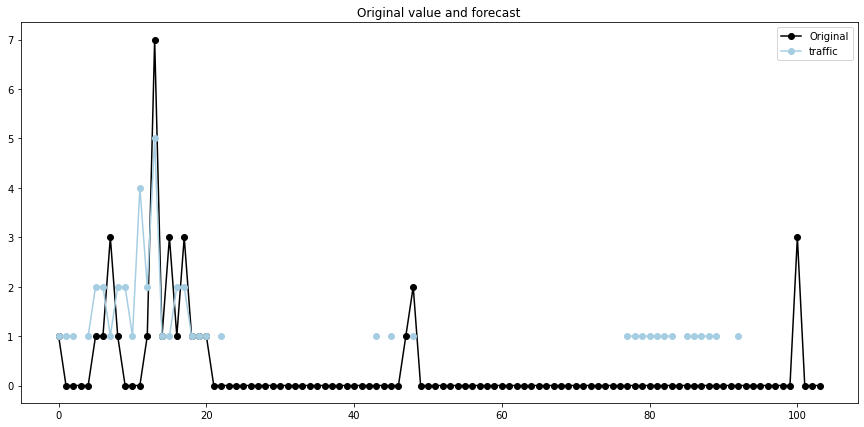

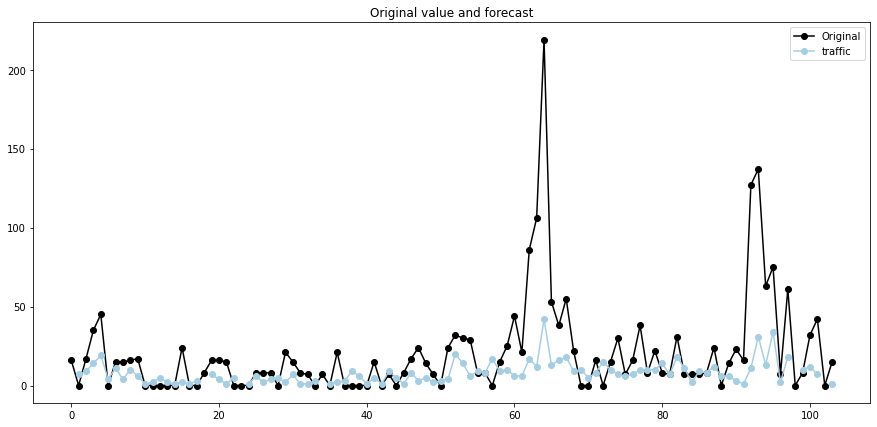

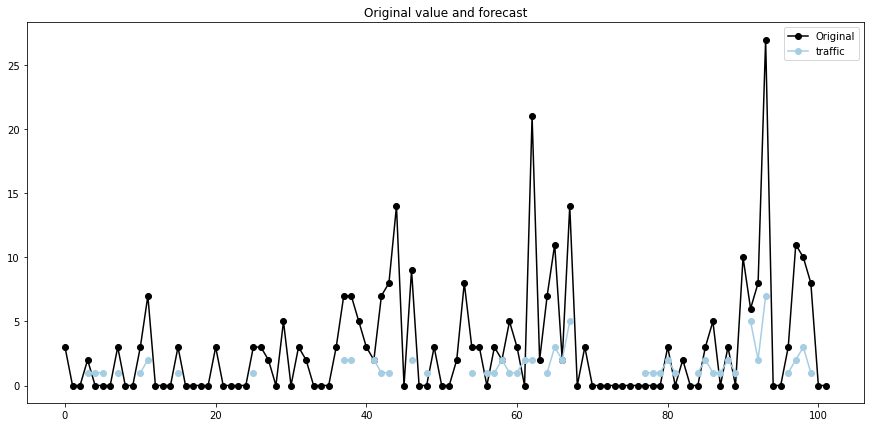

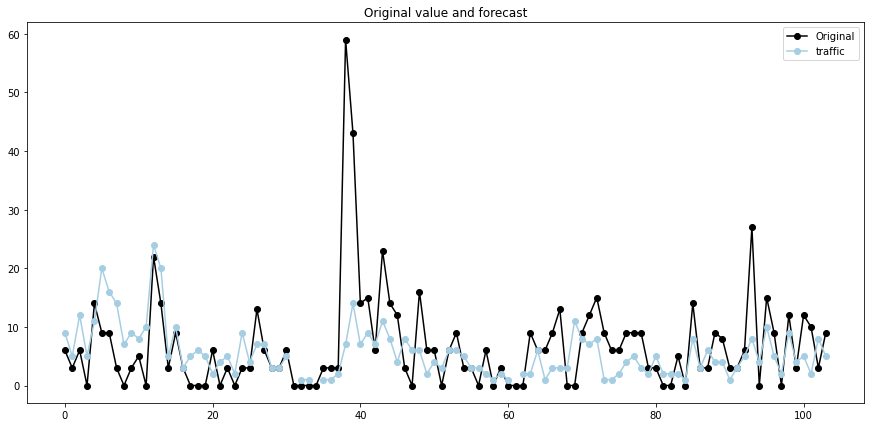

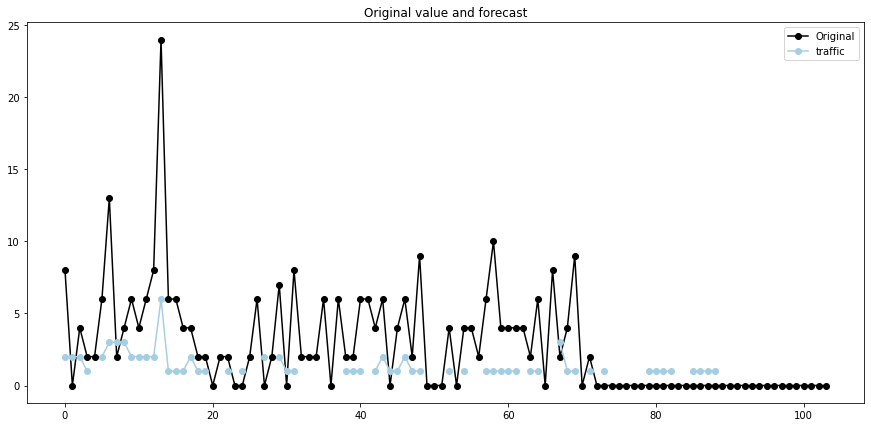

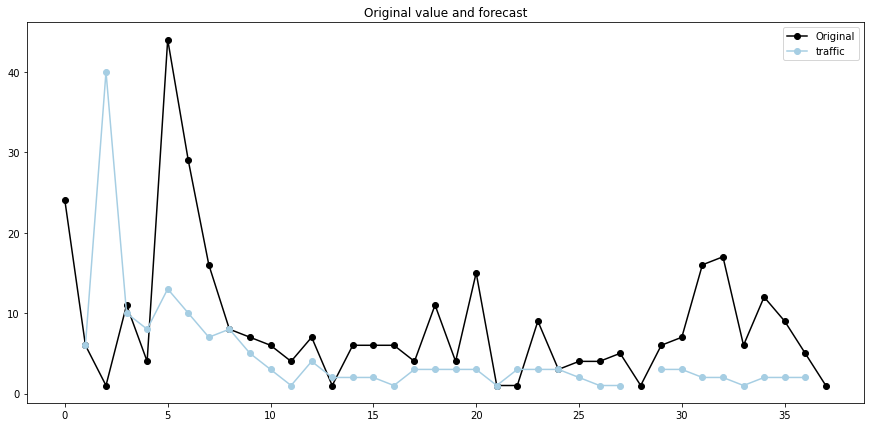

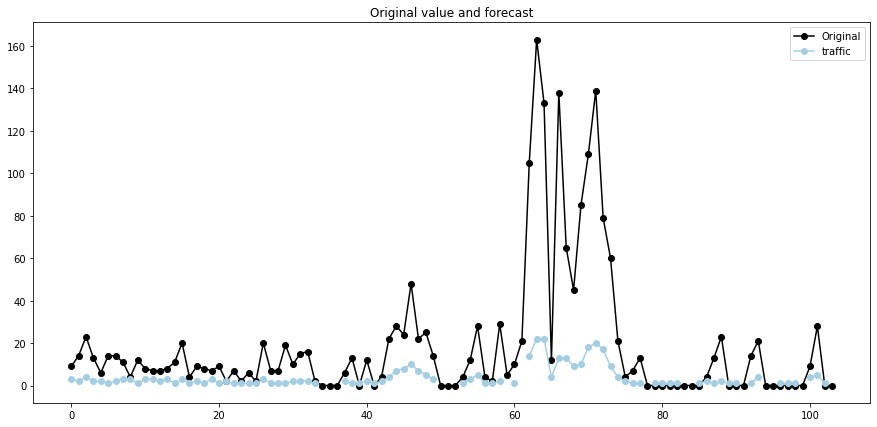

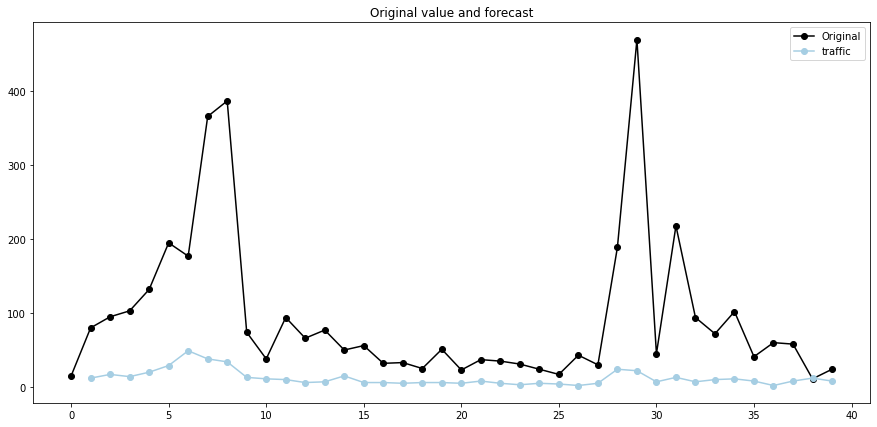

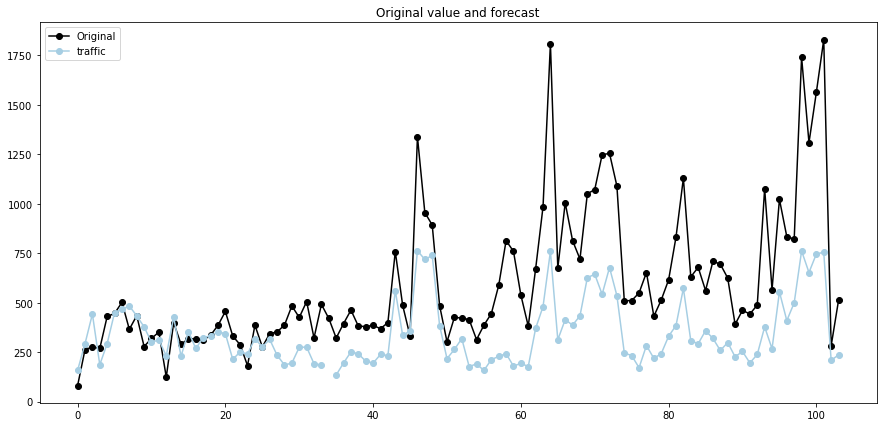

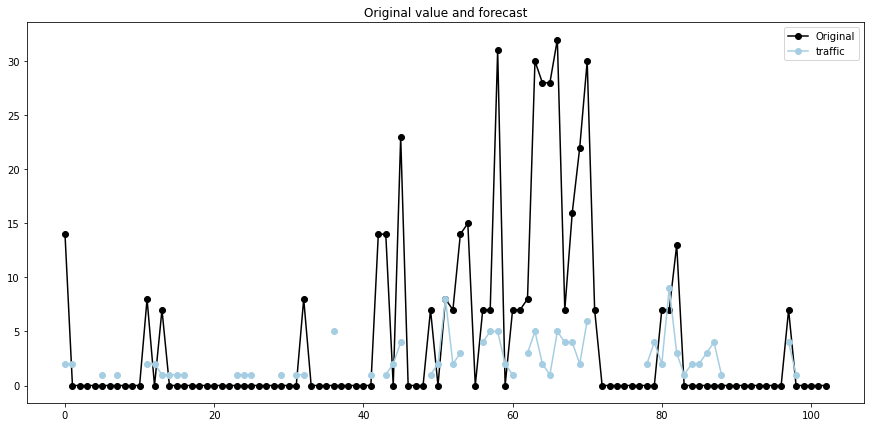

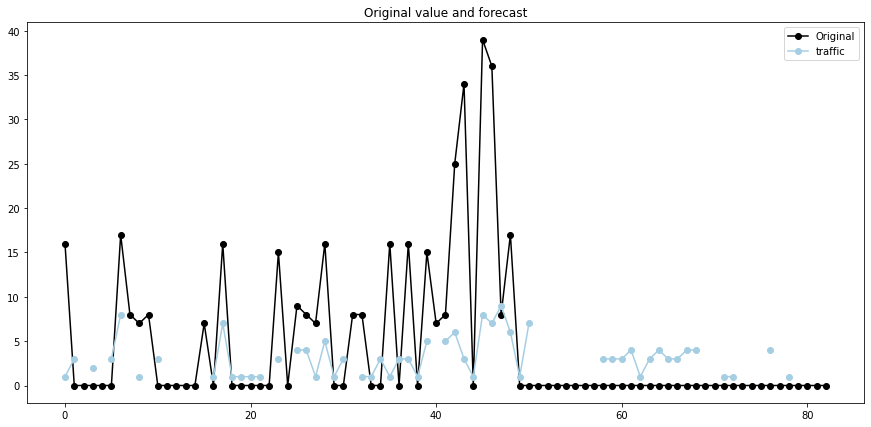

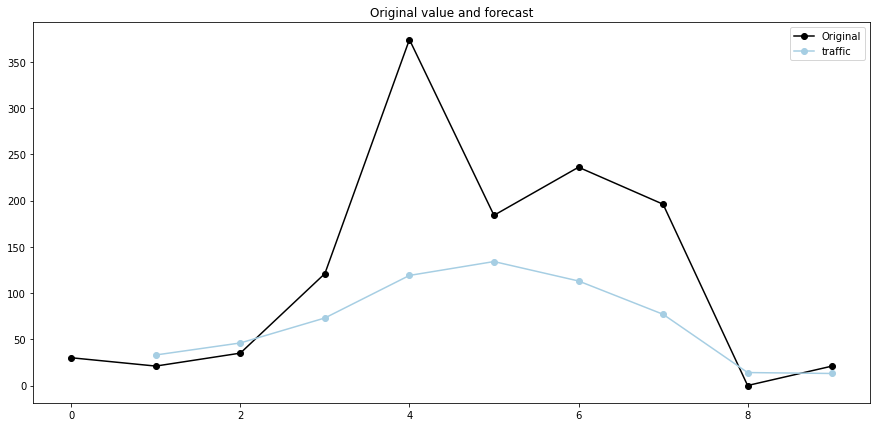

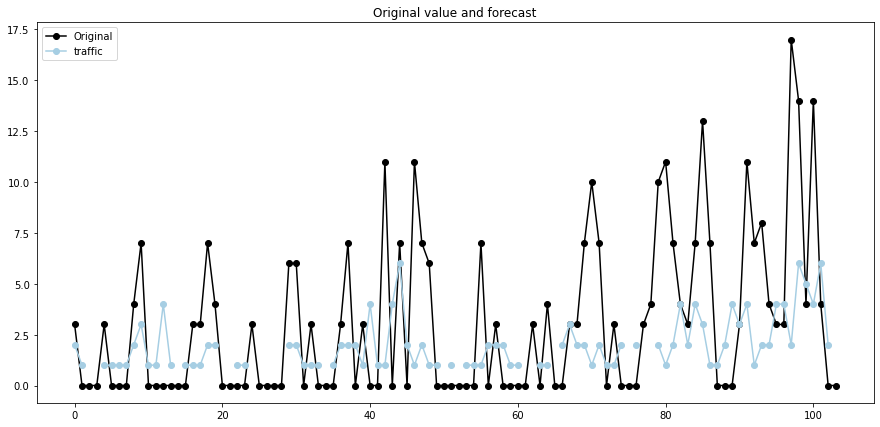

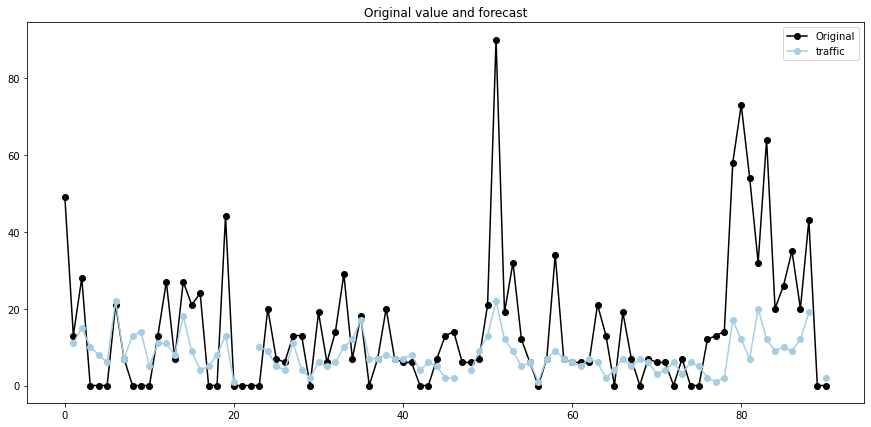

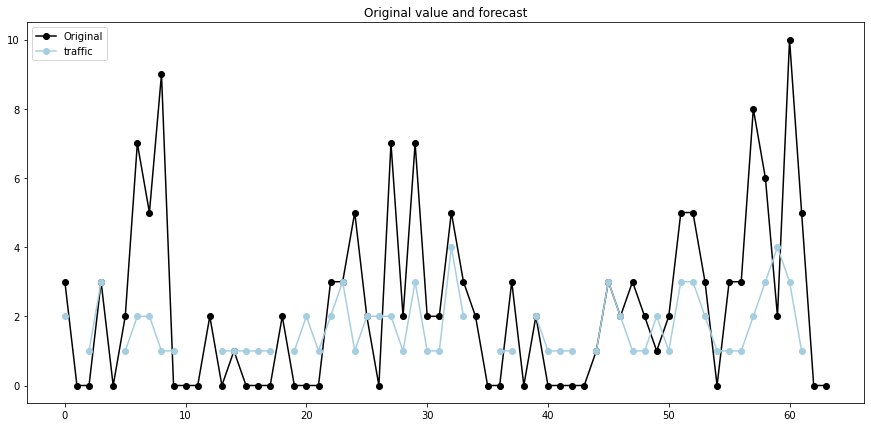

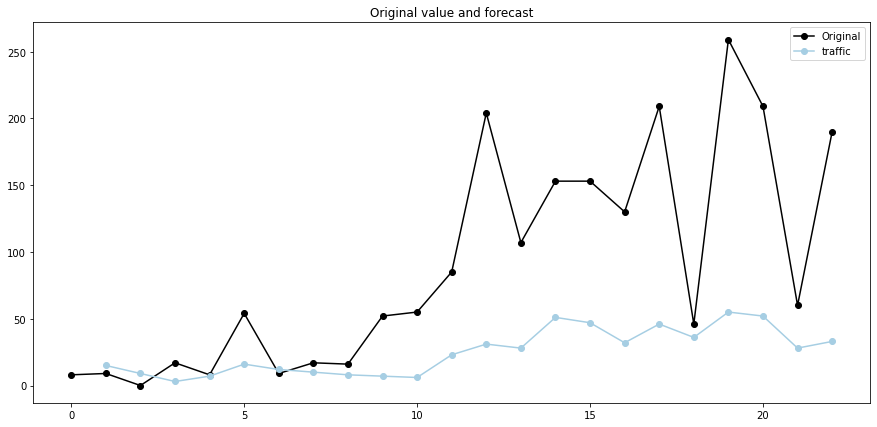

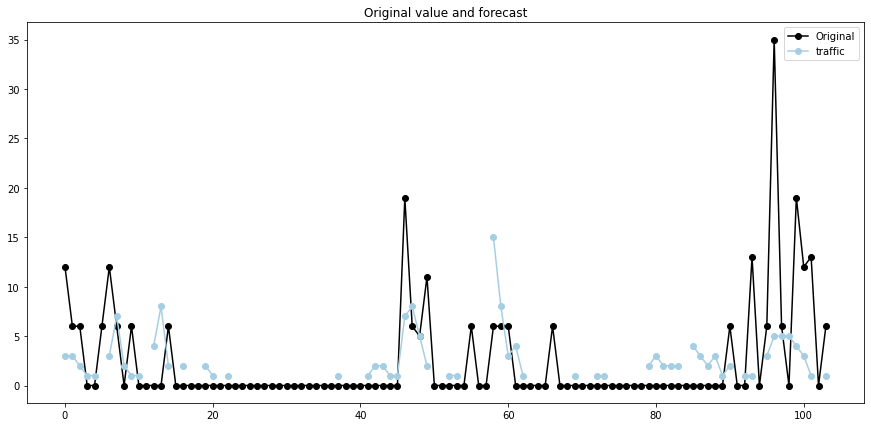

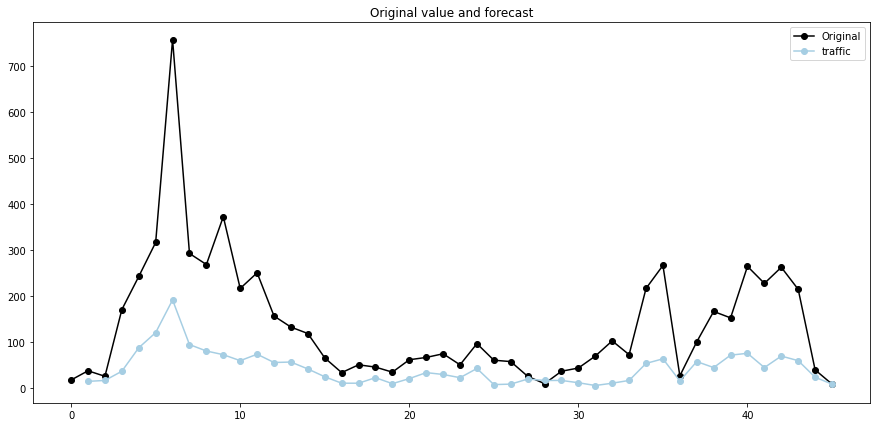

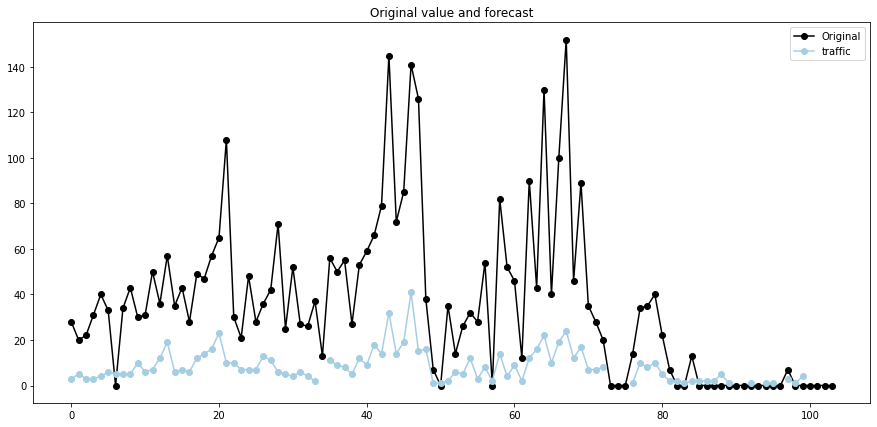

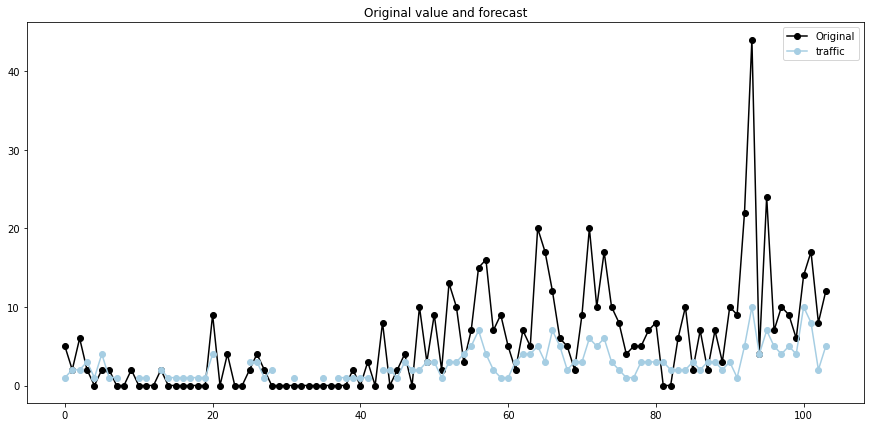

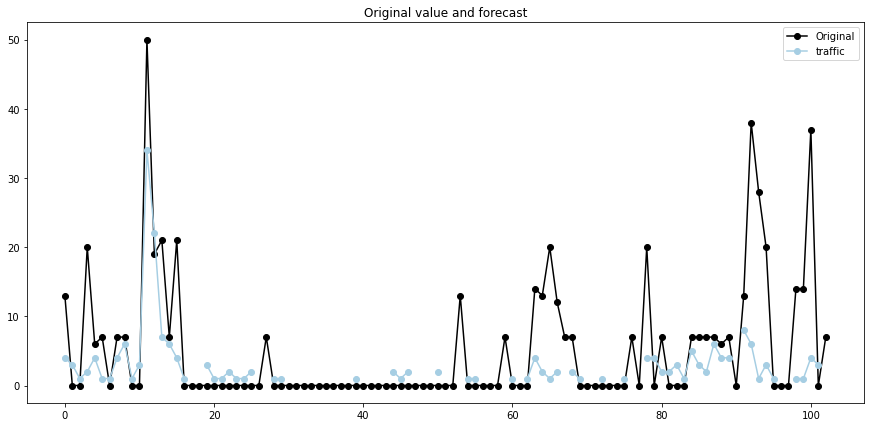

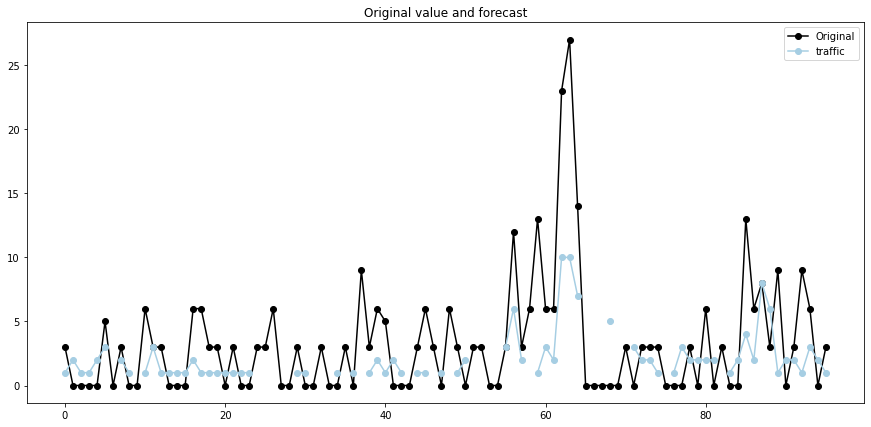

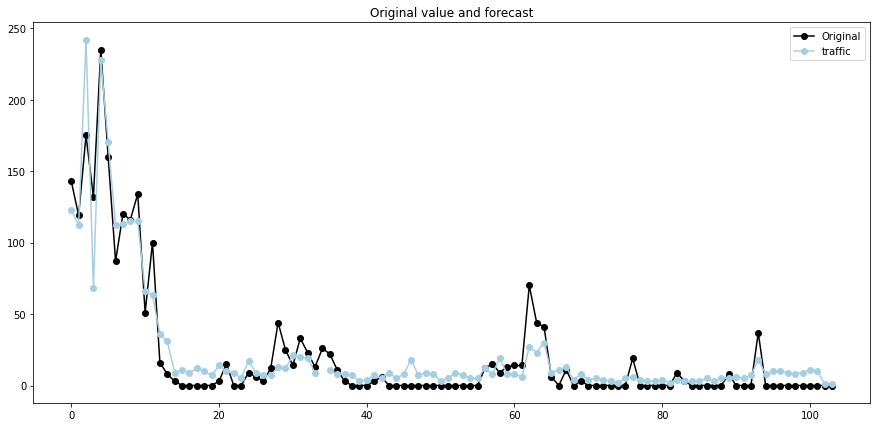

In [139]:
for i in [  21,   28,  118,  135,  163,  223,  288,  357,  494,  513,  538,
             561,  609,  637,  681,  701,  789,  840,  975, 1007, 1065, 1139,
            1211, 1300, 1453, 1476, 1531, 1538, 1565, 1592, 1651, 1726, 1794,
            1813, 2075, 2180, 2232, 2567, 2587, 2605, 2614, 2658, 2778, 2886,
            2891, 3057, 3110]:
  plotting.plot_original_and_forecasts(sales_df_combined_right.loc[[i], (slice(None))].sales.values, {'traffic': sales_df_combined_right.loc[[i], (slice(None))].traffic.values})